# Questions

- [X] What words combinations get the most Engagement?
- [X] What words combinations get less engagement?
- [X] What words combinations get more engagement in the start of headline?
- [X] What words combinations get more engagement in the end of headline?


## Next steps

- [ ] Use Plotly

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well. We also need unicodedat, re and nltk normalize text data.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import unicodedata
import re


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

plt.rcParams["figure.figsize"] = (10, 10)

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-science-articles-2021.csv')
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://medium.com/@dharmeshpanchmatia/data-analytics-and-ai-ml-platform-for-ecommerce-68639df89c7f,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01
1,https://medium.com/predict/the-journey-from-an-apple-silicon-m1-powered-laptop-to-an-amd-ryzen-threadripper-3-desktop-6315252ac9d1,The journey from an Apple Silicon M1 powered laptop to an AMD Ryzen Threadripper 3 desktop.,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01
2,https://medium.com/@rajsaraogi/demystifying-kpis-in-analytics-60084292412c,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D1%8F-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D1%87%D0%B5%D0%BC-%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F-%D0%BF%D0%BE%D1%82%D0%BE%D0%BA%D0%BE%D0%B2%D0%B0%D1%8F-%D0%BF%D0%B5%D1%80%D0%B5%D0%B4%D0%B0%D1%87%D0%B0-%D0%B2-apache-spark-%D0%BE%D1%82%D0%BB%D0%B8%D1%87%D0%B0%D0%B5%D1%82%D1%81%D1%8F-%D0%BE%D1%82-spark-c3fcc3625679,Большая разница: чем структурированная потоковая передача в Apache Spark отличается от Spark Streaming,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01
4,https://medium.com/@arnowa-44509/iot-a-new-way-of-life-249f69134af9,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, it’s a network of new…",0.0,0.0,3.0,Big Data,2021-01-01


# Preparing data

## Find url duplicateds values and drop it

As same Url means same articles, let's remove it.

In [2]:
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df[df.url.duplicated(keep=False)]

 We have 1 duplicated values in url colum


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
24526,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,"<strong class=""markup--strong markup--h3-strong""><em class=""markup--em markup--h3-em"">I’m a Data Scientist — Here’s why I work at Facebook</em></strong>",veronikabelokhvostova,https://medium.com/@veronikabelokhvostova,NaN,591.0,0.0,7.0,Data Science,2021-10-07
25593,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,Facebook destroyed my family andmy mother and grandfather.,lexahe3185,https://medium.com/@lexahe3185,NaN,0.0,0.0,0.0,Data Science,2021-10-12


In [3]:
# I analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(f' We have {df.url.duplicated().sum()} duplicated values in url column')
df.shape

 We have 0 duplicated values in url column


(47659, 10)

## Modeling Data

### Data understanding

Let's take a look on df titles

In [4]:
df.title[:10]

0                                                           Data Analytics and AI/ML platform for eCommerce
1               The journey from an Apple Silicon M1 powered laptop to an AMD Ryzen Threadripper 3 desktop.
2                                                                            Demystifying KPIs in Analytics
3    Большая разница: чем структурированная потоковая передача в Apache Spark отличается от Spark Streaming
4                                                                                    IoT: A New Way of Life
5         <strong class="markup--strong markup--h3-strong">CyerberVein Content Contributor Program</strong>
6                                                                 Analyzing my LinkedIn Network with Python
7         #EPL | Cantidad y calidad de tiros a puerta realizados y recibidos por equipos de #PremierLeague.
8                                               A gentle overview of the Deep Learning and Machine Learning
9                           

### Cleaning the data

As you can see, it has some confusing character, lots of ponctuation, and HTML infos, so we need to normalize the data.

In [5]:
def normalize_title(title):
    title = unicodedata.normalize("NFKD", title) # normalize data
    title = re.sub('<[^>]+>', '', title) # remove anything beteween <> (html noise)
    title = title.lower() # put title in lower case
    title = re.sub("\d", 'X', title) # replace numbers by X
    
    title = re.sub(r'[^\w\s]','',title) # Remove ponctuation
    
    #Remove stop words
    #title = word_tokenize(title) #remove stop words
    #title = [word for word in title if not word in stop_words]
    #title = (" ").join(title)
    
    return title 
    
df.title = df.title.apply(normalize_title)
df.title[:10]

0                                                           data analytics and aiml platform for ecommerce
1               the journey from an apple silicon mX powered laptop to an amd ryzen threadripper X desktop
2                                                                           demystifying kpis in analytics
3    большая разница чем структурированная потоковая передача в apache spark отличается от spark streaming
4                                                                                    iot a new way of life
5                                                                  cyerbervein content contributor program
6                                                                analyzing my linkedin network with python
7            epl  cantidad y calidad de tiros a puerta realizados y recibidos por equipos de premierleague
8                                              a gentle overview of the deep learning and machine learning
9                                    

Much Better!!

As you can see, i commented the stop word treatment, i did it because it was overshadowing my analisys.

## Get data insights
### Extracting word combinations data from headline

In [6]:
#Build a python dict of dicts, that contains raw infos about words combinations

dict_word_combinations = {}

for title, claps, responses in zip(df.title, df.claps, df.responses):
    splited_title = title.split(' ')
    
    if len(splited_title) > 2:
        for i in range((len(splited_title) - 2)):
            word_combination = f'{splited_title[i]} {splited_title[i+1]} {splited_title[i+2]}' # Get sets of 3 words
            if word_combination in dict_word_combinations.keys(): 
                dict_word_combinations[word_combination]['frequency'] += 1
                dict_word_combinations[word_combination]['total_claps'] += claps
                dict_word_combinations[word_combination]['total_responses'] += responses
            else: #If it's new
                dict_word_combinations[word_combination] = {'word_combination': word_combination,
                                                            'frequency' : 1, 
                                                            'total_claps': claps,
                                                            'total_responses': responses,
                                                            'first_words': 0,
                                                            'first_words_total_claps' : 0,
                                                            'last_words': 0,
                                                            'last_words_total_claps' : 0,
                                                           }
                                                            
            if i == 0: # If it the headline start
                dict_word_combinations[word_combination]['first_words'] += 1
                dict_word_combinations[word_combination]['first_words_total_claps'] += claps
            if i == len(splited_title) - 3:  # If it the headline finish
                dict_word_combinations[word_combination]['last_words'] += 1
                dict_word_combinations[word_combination]['last_words_total_claps'] += claps

To make our analisys easy, lets transform the dict in a panda DataFrame

In [7]:
df_word_combination = pd.DataFrame([dict_word_combinations[x] for x in dict_word_combinations.keys()])
df_word_combination 

,word_combination,frequency,total_claps,total_responses,first_words,first_words_total_claps,last_words,last_words_total_claps
0,data analytics and,22,269.0,0.0,8,39.0,0,0.0
1,analytics and aiml,1,30.0,0.0,0,0.0,0,0.0
2,and aiml platform,1,30.0,0.0,0,0.0,0,0.0
3,aiml platform for,1,30.0,0.0,0,0.0,0,0.0
4,platform for ecommerce,1,30.0,0.0,0,0.0,1,30.0
...,...,...,...,...,...,...,...,...
204185,solution including product,1,137.0,0.0,0,0.0,0,0.0
204186,including product flavor,1,137.0,0.0,0,0.0,1,137.0
204187,speedy success of,1,0.0,0.0,0,0.0,0,0.0
204188,success of cyclistic,1,0.0,0.0,0,0.0,0,0.0


## What is the most popular set of words?

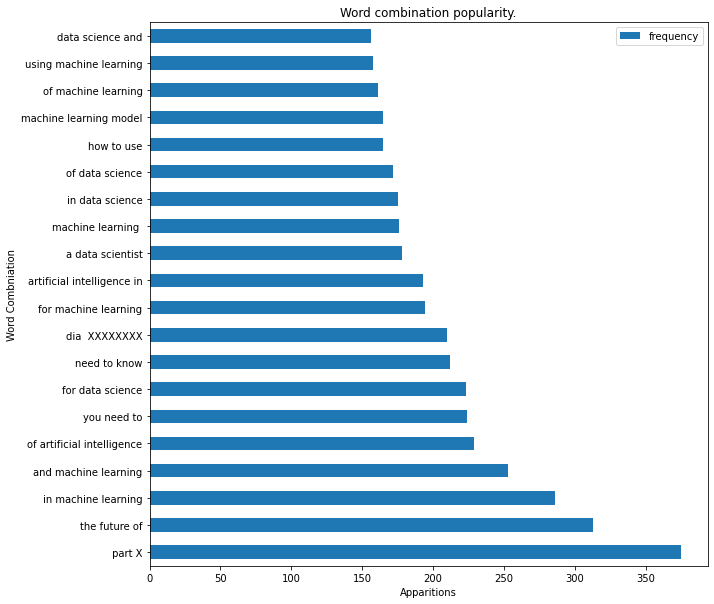

In [8]:

df_word_combination.sort_values('frequency',ascending=False)[:20].plot.barh(x='word_combination', y='frequency')
plt.title('Word combination popularity.')
plt.xlabel('Apparitions')
plt.ylabel('Word Combniation')
plt.show()

## WordCloud for words combination popularity

In [9]:
from wordcloud import WordCloud
weights = {x: dict_word_combinations[x]['frequency'] for x in dict_word_combinations}


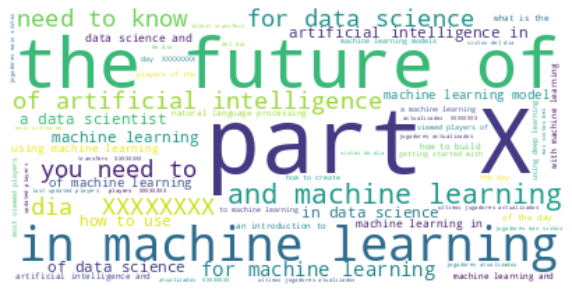

In [10]:
wc = WordCloud(background_color='white', contour_width=1000)
wc.generate_from_frequencies(weights)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## What cobination of words in headlines atract more claps?

In [11]:
#list_word_combination

In [12]:
#Extract mean values for claps and trashold for freqency to remove outliers.

X = 50
df_word_combination['claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.total_claps / row.frequency 
                                                              if row.frequency >= X 
                                                              else None , axis=1)

Y = 25
df_word_combination['last_words_claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.last_words_total_claps / row.last_words 
                                                              if row.last_words >= Y
                                                              else None , axis=1)

Z = 25
df_word_combination['first_words_claps_mean'] = df_word_combination.apply(lambda row: 
                                                              row.first_words_total_claps / row.first_words 
                                                              if row.first_words >= Z
                                                              else None , axis=1)

df_word_combination.head()

,word_combination,frequency,total_claps,total_responses,first_words,first_words_total_claps,last_words,last_words_total_claps,claps_mean,last_words_claps_mean,first_words_claps_mean
0,data analytics and,22,269.0,0.0,8,39.0,0,0.0,NaN,NaN,NaN
1,analytics and aiml,1,30.0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
2,and aiml platform,1,30.0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
3,aiml platform for,1,30.0,0.0,0,0.0,0,0.0,NaN,NaN,NaN
4,platform for ecommerce,1,30.0,0.0,0,0.0,1,30.0,NaN,NaN,NaN


In [13]:
print(f' There are {df_word_combination.claps_mean.notna().sum()} set of words that appear more than {X} times')
print(f' There are {df_word_combination.last_words_claps_mean.notna().sum()} set of words as last words that appear more than {Y} times')
print(f' There are {df_word_combination.first_words_claps_mean.notna().sum()} set of words as first words that appear more than {Z} times')

 There are 144 set of words that appear more than 50 times
 There are 55 set of words as last words that appear more than 25 times
 There are 73 set of words as first words that appear more than 25 times


## Analysing Best words combinations

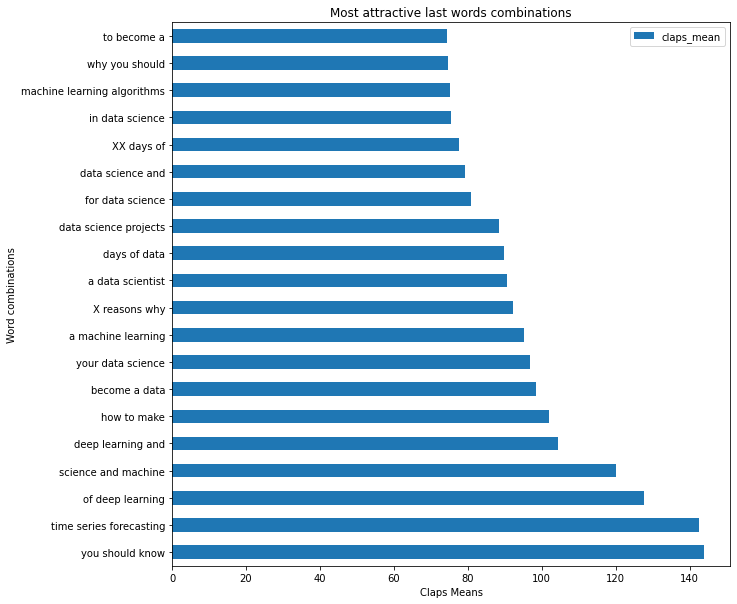

In [14]:
df_word_combination.sort_values('claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='claps_mean')
plt.title('Most attractive last words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

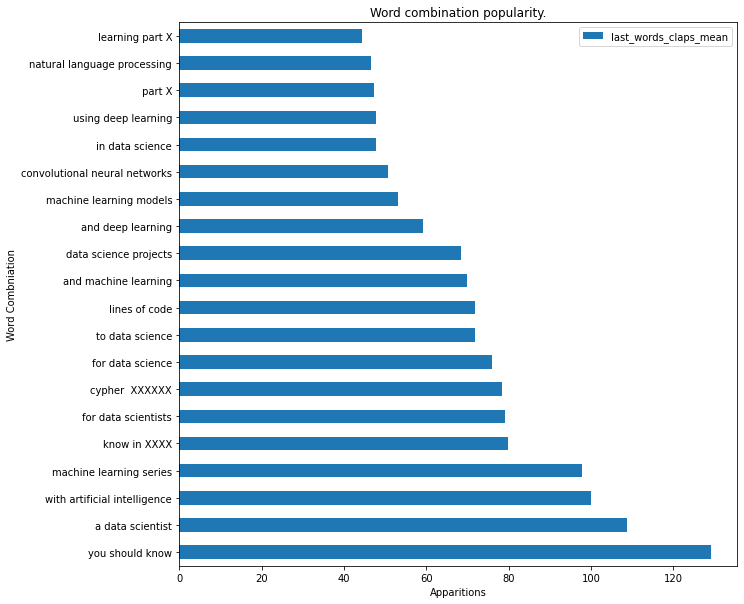

In [15]:
df_word_combination.sort_values('last_words_claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='last_words_claps_mean')
plt.title('Word combination popularity.')
plt.xlabel('Apparitions')
plt.ylabel('Word Combniation')
plt.show()

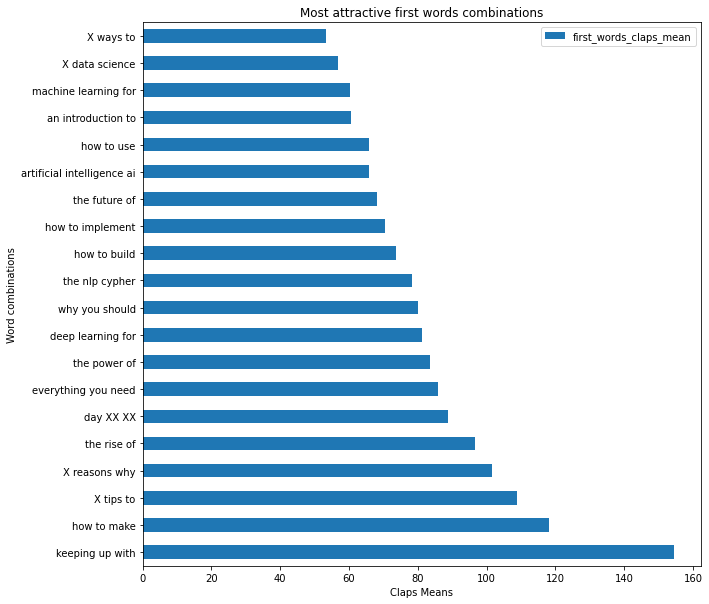

In [16]:
df_word_combination.sort_values('first_words_claps_mean',ascending=False)[:20].plot.barh(x='word_combination', y='first_words_claps_mean')
plt.title('Most attractive first words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

## Analysing Worses words combinations

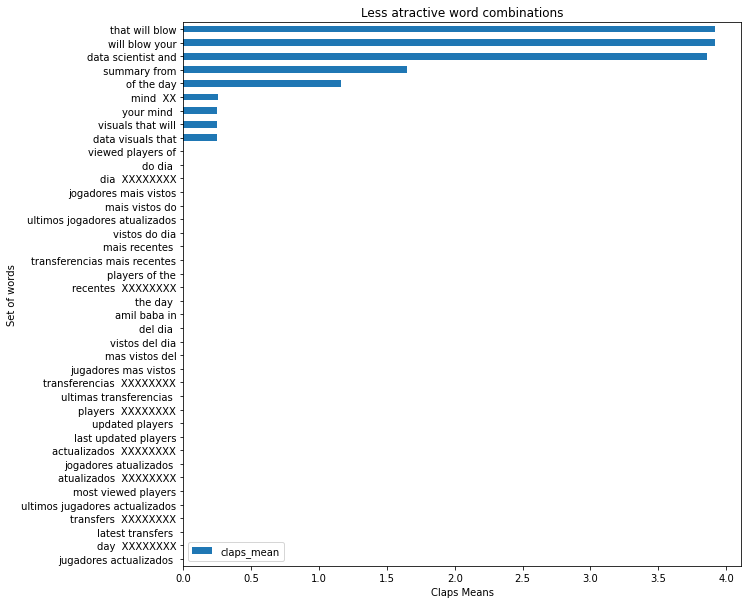

In [17]:
df_word_combination.sort_values('claps_mean',ascending=True)[:40].plot.barh(x='word_combination', y='claps_mean')

plt.title('Less atractive word combinations')
plt.xlabel('Claps Means')
plt.ylabel('Set of words')
plt.show()

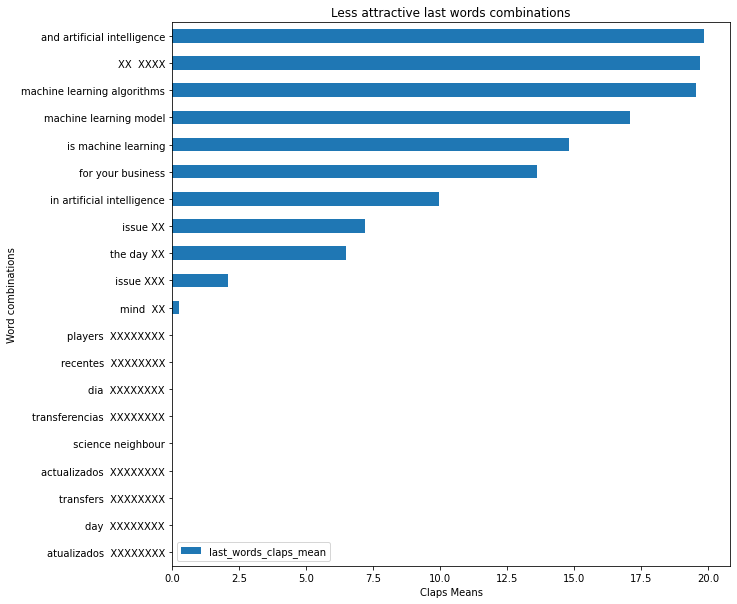

In [18]:
df_word_combination.sort_values('last_words_claps_mean',ascending=True)[:20].plot.barh(x='word_combination', y='last_words_claps_mean')
plt.title('Less attractive last words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

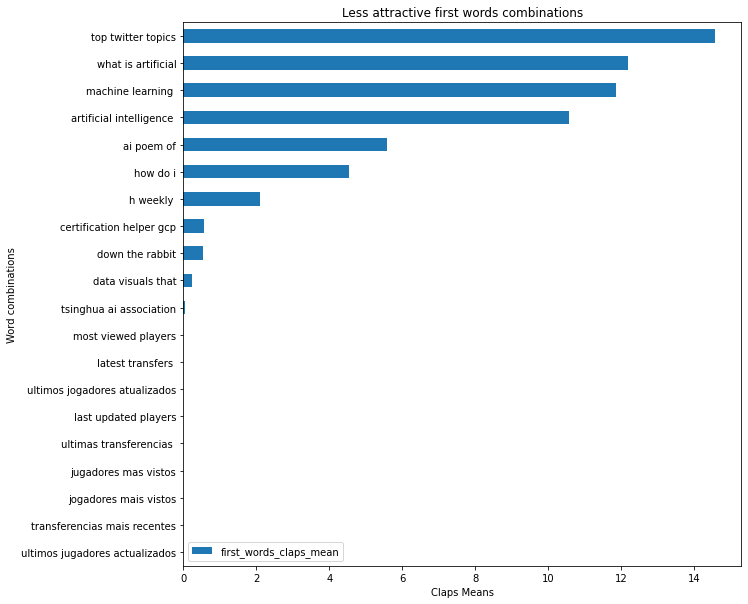

In [19]:
df_word_combination.sort_values('first_words_claps_mean',ascending=True)[:20].plot.barh(x='word_combination', y='first_words_claps_mean')
plt.title('Less attractive first words combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()